Şarkı: Time is Running Out
Sanatçı: Muse
Albüm: Absolution
Çıkış Tarihi: 2004-03-23

Audio Features: {'danceability': 0.585, 'energy': 0.842, 'key': 9, 'loudness': -5.883, 'mode': 0, 'speechiness': 0.0556, 'acousticness': 0.00242, 'instrumentalness': 0.00686, 'liveness': 0.0866, 'valence': 0.428, 'tempo': 118.211, 'type': 'audio_features', 'id': '2takcwOaAZWiXQijPHIx7B', 'uri': 'spotify:track:2takcwOaAZWiXQijPHIx7B', 'track_href': 'https://api.spotify.com/v1/tracks/2takcwOaAZWiXQijPHIx7B', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2takcwOaAZWiXQijPHIx7B', 'duration_ms': 237040, 'time_signature': 4}

Audio Analysis Summary:
Bars: 115 elements
Beats: 462 elements
Sections: 8 elements
Segments: 733 elements


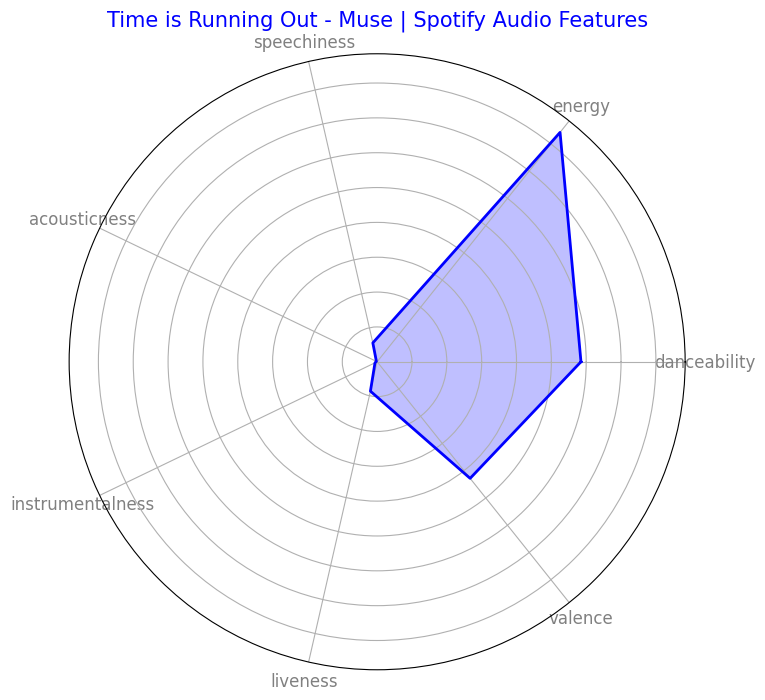

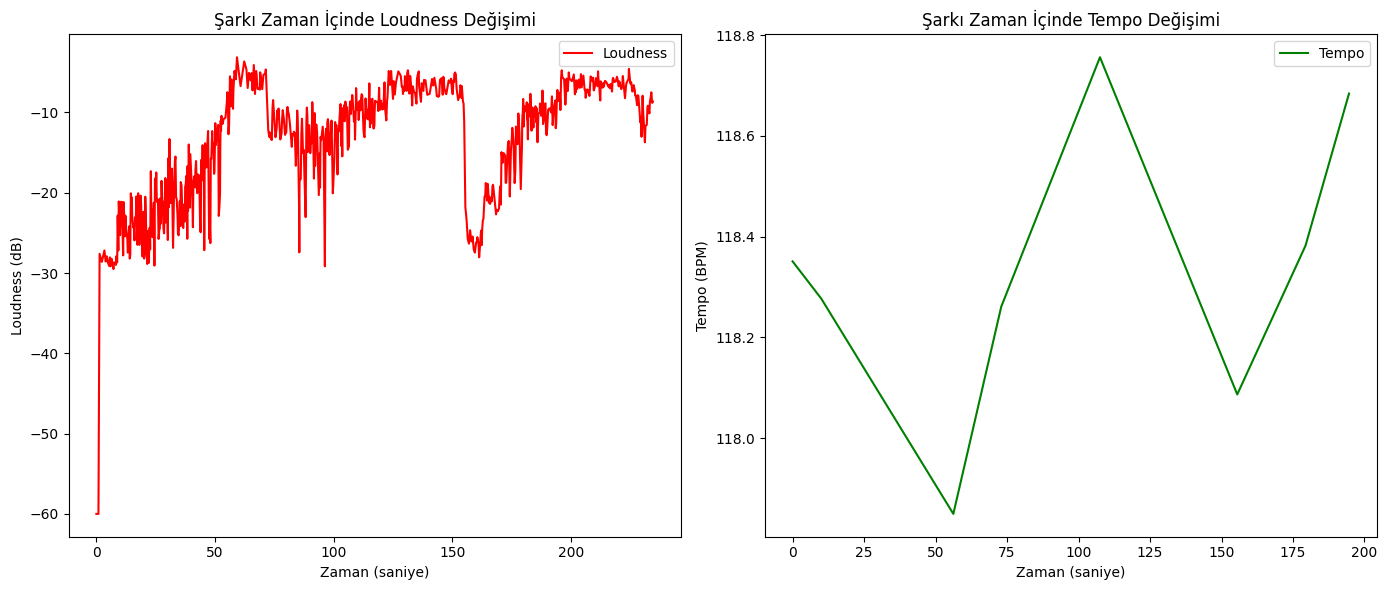

In [10]:
# spotify ve pandas kütüphaneleri veri cekme ve analiz icin yükleyelim artı plot
!pip install spotipy pandas matplotlib

import os
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# config.json dosyasını workspace'ten okuyalim burada vermek güvenli degil
with open('/content/config.json') as config_file:
    config = json.load(config_file)
    os.environ['SPOTIPY_CLIENT_ID'] = config['SPOTIPY_CLIENT_ID']
    os.environ['SPOTIPY_CLIENT_SECRET'] = config['SPOTIPY_CLIENT_SECRET']

# spoti apisinin formati bu böyle alıyor
client_id = os.environ['SPOTIPY_CLIENT_ID']
client_secret = os.environ['SPOTIPY_CLIENT_SECRET']

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# Track id linkten alip direk bu tracki çekelim klasik istiklalmarsi 1986
track_id = '2takcwOaAZWiXQijPHIx7B'  # Spotify track ID

# track info bu formatta çekiyor rest docsda böyle
track_info = sp.track(track_id)
track_name = track_info['name']
artist_name = track_info['artists'][0]['name']
album_name = track_info['album']['name']
release_date = track_info['album']['release_date']

print(f"Şarkı: {track_name}")
print(f"Sanatçı: {artist_name}")
print(f"Albüm: {album_name}")
print(f"Çıkış Tarihi: {release_date}")

# audio featuresta track datası var webapi docs çok acik
audio_features = sp.audio_features(track_id)[0]
print("\nAudio Features:", audio_features)

# bir de ses analizi kısmında veri var.
audio_analysis = sp.audio_analysis(track_id)
print("\nAudio Analysis Summary:")
for analysis_key in ["bars", "beats", "sections", "segments"]:
    print(f"{analysis_key.capitalize()}: {len(audio_analysis[analysis_key])} elements")

feature_names = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
feature_values = [audio_features[feature] for feature in feature_names]

# radar analizi
angles = np.linspace(0, 2 * np.pi, len(feature_names), endpoint=False).tolist()
feature_values += feature_values[:1]  # Kapanış için ilk değeri sona ekle
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, feature_values, color='blue', alpha=0.25)
ax.plot(angles, feature_values, color='blue', linewidth=2)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(feature_names, color='gray', size=12)

plt.title(f"{track_name} - {artist_name} | Spotify Audio Features", size=15, color='blue')
plt.show()

# tempo analizi zamanlı sectional
segments_df = pd.DataFrame(audio_analysis['segments'])
sections_df = pd.DataFrame(audio_analysis['sections'])

plt.figure(figsize=(14, 6))

# ses grafigi ne kadar yüksek
plt.subplot(1, 2, 1)
plt.plot(segments_df['start'], segments_df['loudness_start'], color='red', label='Loudness')
plt.xlabel('Zaman (saniye)')
plt.ylabel('Loudness (dB)')
plt.title('Şarkı Zaman İçinde Loudness Değişimi')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sections_df['start'], sections_df['tempo'], color='green', label='Tempo')
plt.xlabel('Zaman (saniye)')
plt.ylabel('Tempo (BPM)')
plt.title('Şarkı Zaman İçinde Tempo Değişimi')
plt.legend()

plt.tight_layout()
plt.show()
